In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('ee-train.csv')
df_test = pd.read_csv('ee-test.csv')

print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       384 non-null    float64
 1   Surface Area               384 non-null    float64
 2   Wall Area                  384 non-null    float64
 3   Roof Area                  384 non-null    float64
 4   Overall Height             384 non-null    float64
 5   Orientation                384 non-null    int64  
 6   Glazing Area               384 non-null    float64
 7   Glazing Area Distribution  384 non-null    int64  
 8   Heating Load               384 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 27.1 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Re

In [3]:
df_train.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load'],
      dtype='object')

In [4]:
for i in df_train.columns:
    print(i, end=', ')

Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution, Heating Load, 

In [5]:
df_train

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.62,808.5,367.5,220.5,3.5,3,0.10,5,12.74
1,0.90,563.5,318.5,122.5,7.0,3,0.10,2,29.68
2,0.90,563.5,318.5,122.5,7.0,3,0.40,2,36.57
3,0.79,637.0,343.0,147.0,7.0,2,0.25,2,38.57
4,0.90,563.5,318.5,122.5,7.0,4,0.40,5,34.72
...,...,...,...,...,...,...,...,...,...
379,0.62,808.5,367.5,220.5,3.5,4,0.40,1,17.14
380,0.64,784.0,343.0,220.5,3.5,5,0.25,2,17.11
381,0.62,808.5,367.5,220.5,3.5,5,0.10,3,12.73
382,0.71,710.5,269.5,220.5,3.5,4,0.25,3,12.10


In [6]:
df_train.std()

Relative Compactness          0.106553
Surface Area                 88.196712
Wall Area                    42.248972
Roof Area                    44.852410
Overall Height                1.747619
Orientation                   1.097695
Glazing Area                  0.133306
Glazing Area Distribution     1.567506
Heating Load                 10.066099
dtype: float64

In [7]:
df_test

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
2,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71
3,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68
4,0.86,588.0,294.0,147.00,7.0,4,0.0,0,19.34
...,...,...,...,...,...,...,...,...,...
379,0.64,784.0,343.0,220.50,3.5,4,0.4,5,18.16
380,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
381,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
382,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


### Analysis of the target variable

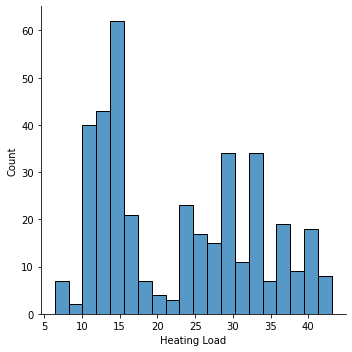

In [8]:
# sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.displot(
    df_train['Heating Load'], kde=False, bins=20,
).set(xlabel='Heating Load', ylabel='Count');

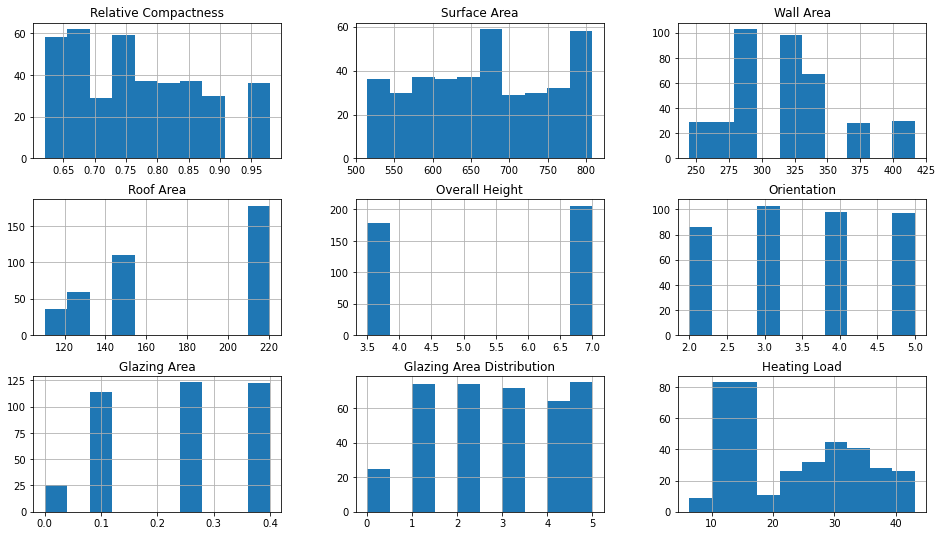

In [9]:
df_train.hist(bins=10, figsize=(16, 9), layout=(3, 3));

In [10]:
col_continuous = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Heating Load']

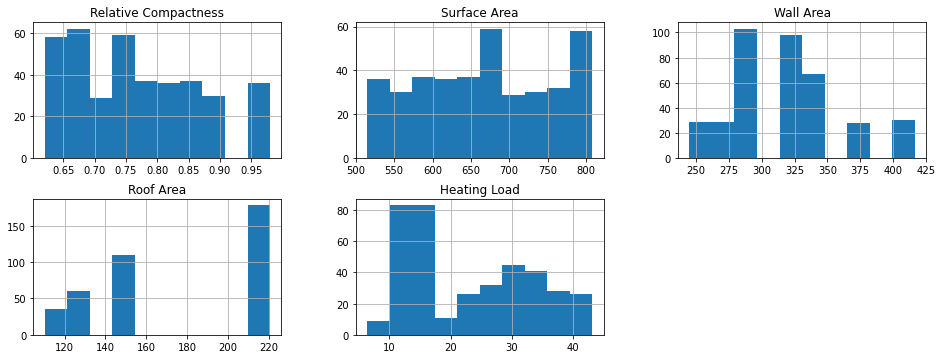

In [11]:
df_train[col_continuous].hist(bins=10, figsize=(16, 9), layout=(3, 3));

In [12]:
col_1 = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Heating Load']
col_2 = ['Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load']

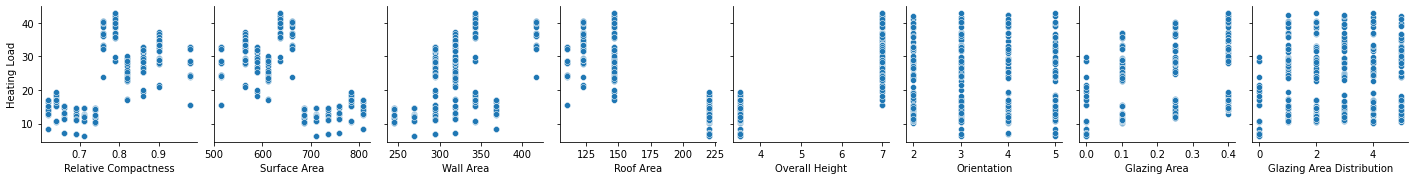

In [13]:
sns.pairplot(df_train, y_vars='Heating Load', \
             x_vars=['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', \
                     'Orientation', 'Glazing Area', 'Glazing Area Distribution']\
            );

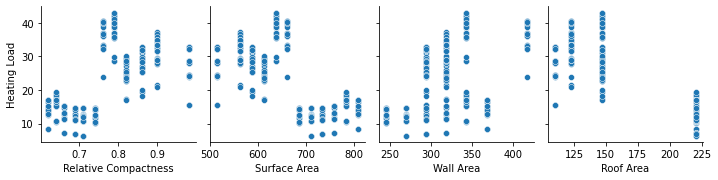

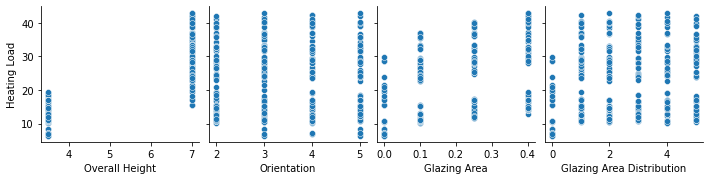

In [14]:
sns.pairplot(df_train, y_vars='Heating Load', \
             x_vars=['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area']
            );
sns.pairplot(df_train, y_vars='Heating Load', \
             x_vars=['Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
            );
             

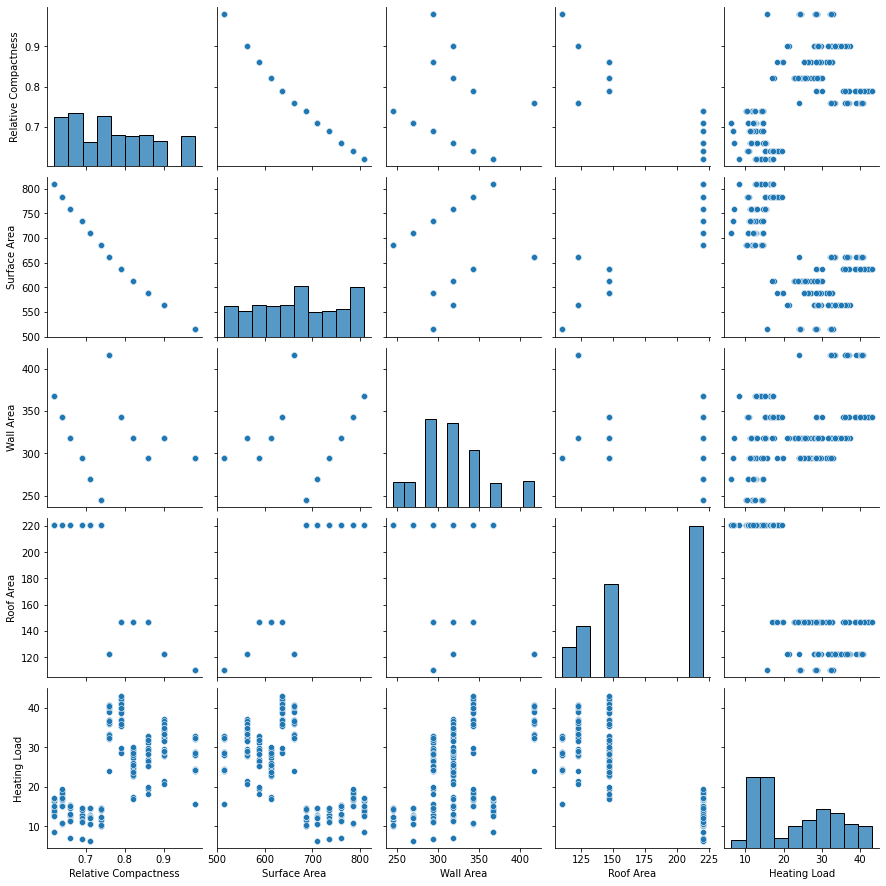

In [15]:
sns.pairplot(df_train.loc[:, col_1])

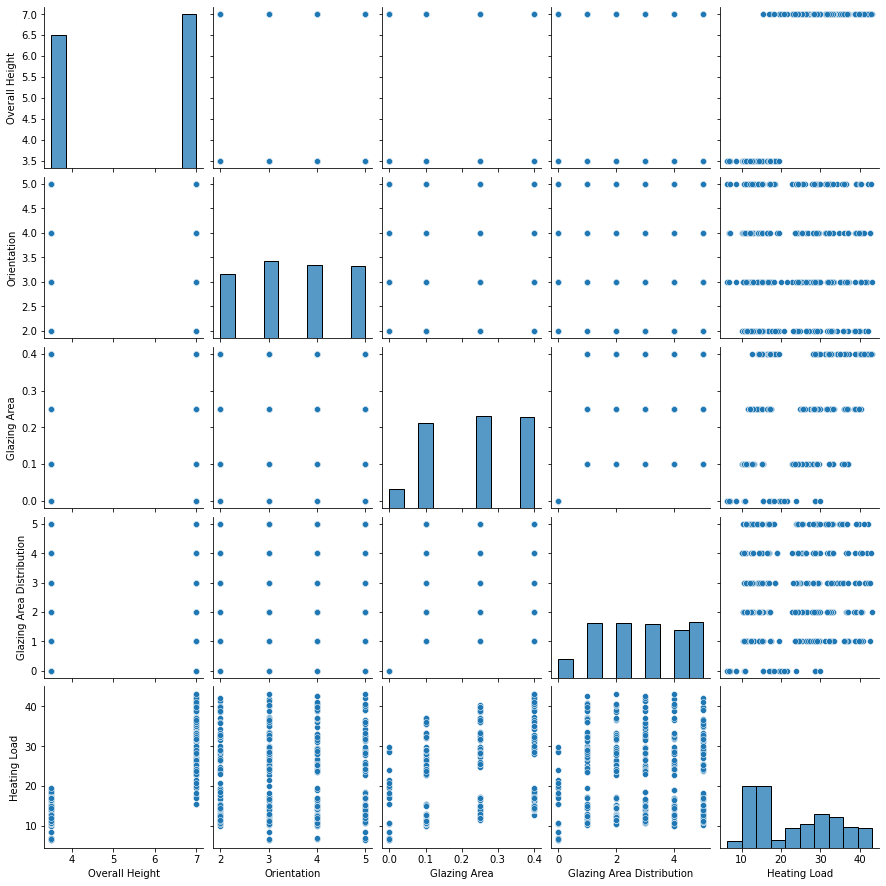

In [16]:
sns.pairplot(df_train.loc[:, col_2]);

In [17]:
df_train.corr()['Heating Load']

Relative Compactness         0.615426
Surface Area                -0.656756
Wall Area                    0.436829
Roof Area                   -0.851451
Overall Height               0.882730
Orientation                  0.026561
Glazing Area                 0.256831
Glazing Area Distribution    0.065567
Heating Load                 1.000000
Name: Heating Load, dtype: float64

In [18]:
print(df_train.corr()['Heating Load'].to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &  Heating Load \\
\midrule
Relative Compactness      &      0.615426 \\
Surface Area              &     -0.656756 \\
Wall Area                 &      0.436829 \\
Roof Area                 &     -0.851451 \\
Overall Height            &      0.882730 \\
Orientation               &      0.026561 \\
Glazing Area              &      0.256831 \\
Glazing Area Distribution &      0.065567 \\
Heating Load              &      1.000000 \\
\bottomrule
\end{tabular}



### Implementation of Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [20]:
reg = LinearRegression(n_jobs=-1)

scaler = StandardScaler()

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
reg.fit(X_train, y_train);

In [28]:
X_test[0]

array([ 1.96363786, -1.71743475, -0.57309174, -1.41864798,  0.92955778,
       -0.4893512 , -1.77905074, -1.77829358])

In [29]:
X_test[0]@reg.coef_

-0.39893304397560725

In [22]:
print(reg.coef_)

[-7.23462823 -3.94215366  0.75595037 -4.23191439  7.20395123 -0.12516927
  2.77021894  0.20406265]


In [31]:
print(reg.intercept_)

22.920703125


In [30]:
y_test_pred[0]

22.521770081024393

In [23]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# squared=False returns rmse instead of mse
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

In [24]:
print('Train rmse:', rmse_train)
print('Test rmse:', rmse_test)

Train rmse: 3.0115517876503612
Test rmse: 2.8435880167333694


In [25]:
for i, v in enumerate(y_test[:10]):
    print('Actual: {} Predicted: {}'.format(v, round(y_test_pred[i], 2)))

Actual: 15.55 Predicted: 22.52
Actual: 15.55 Predicted: 22.41
Actual: 20.71 Predicted: 24.94
Actual: 19.68 Predicted: 24.82
Actual: 19.34 Predicted: 23.8
Actual: 17.05 Predicted: 26.09
Actual: 15.98 Predicted: 25.75
Actual: 29.63 Predicted: 27.25
Actual: 24.77 Predicted: 32.05
Actual: 23.93 Predicted: 31.94


In [26]:
def error_histogram(y_pred, y_targ):
    error_list = y_pred.reshape(-1, 1) - y_targ.reshape(-1, 1)
    plt.hist(error_list, bins=20)
    plt.xlabel("Error")
    plt.ylabel("Number of samples in the bin")
    plt.show()

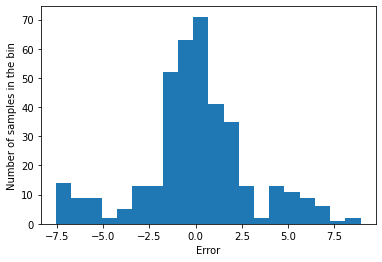

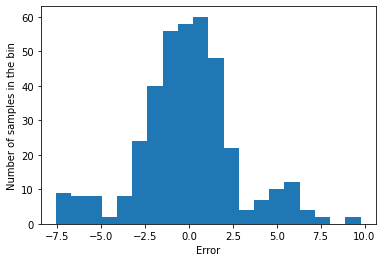

In [27]:
error_histogram(y_train_pred, np.array(y_train))
error_histogram(y_test_pred, np.array(y_test))